<a href="https://colab.research.google.com/github/CristianS1988/Trabajo_Statical_DL/blob/main/TrabajoSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Hoja de Trabajo: Aplicación de Deep Learning y Convolución
en Clasificación de Imágenes
Obje&vo: Aplicar los conceptos adquiridos en el área de Deep Learning y convolución para
la creación de una red neuronal que clasifique imágenes.
Usted debe de buscar dos bases de datos de imágenes que le permita hacer un modelo de
deep learning u>lizando convolución (uno por cada base de datos).
Para esto debe u>lizar la libreria TensorFlow (Image Classifica&on).
Ejercicios:

Ejercicios:
Ejercicio 1: Preprocesamiento de Datos
Descarga y explora los datasets A y B.
U>liza la librería TensorFlow para cargar y preprocesar las imágenes.
Divide cada dataset en conjuntos de entrenamiento y validación (80-20).

In [21]:
import tensorflow_datasets as tfds

# Cargar los datasets
(ds_train_cassava, ds_test_cassava), ds_info_cassava = tfds.load('cassava', split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True)
(ds_train_plant_village, ds_test_plant_village), ds_info_plant_village = tfds.load('plant_village', split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True)

# Redimensionar las imágenes para que sean más manejables
IMG_SIZE = 150

ds_train_cassava = ds_train_cassava.map(lambda image, label: (tf.image.resize(image, (IMG_SIZE, IMG_SIZE))/255.0, label))
ds_test_cassava = ds_test_cassava.map(lambda image, label: (tf.image.resize(image, (IMG_SIZE, IMG_SIZE))/255.0, label))

ds_train_plant_village = ds_train_plant_village.map(lambda image, label: (tf.image.resize(image, (IMG_SIZE, IMG_SIZE))/255.0, label))
ds_test_plant_village = ds_test_plant_village.map(lambda image, label: (tf.image.resize(image, (IMG_SIZE, IMG_SIZE))/255.0, label))


Imágenes de Cassava:


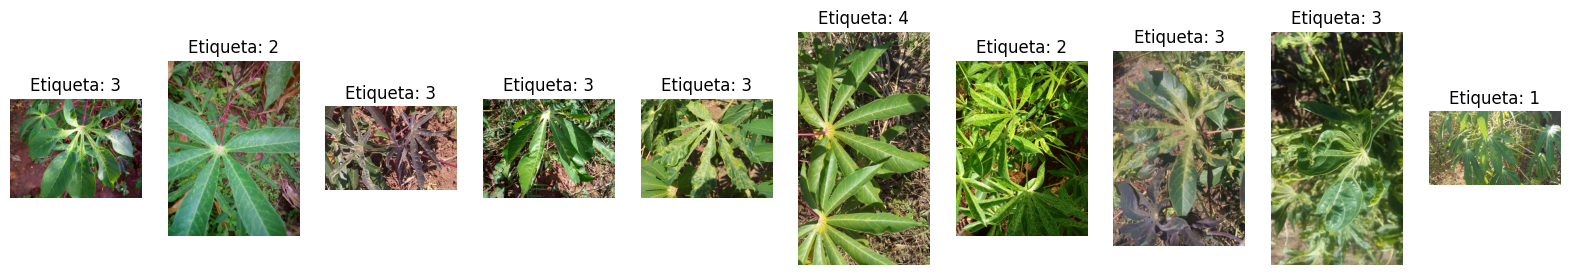

Imágenes de Plant Village:


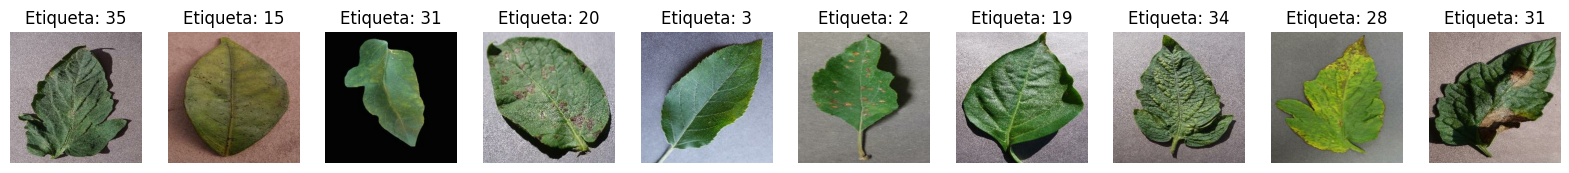

In [22]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Cargar los datasets
cassava_data, cassava_info = tfds.load('cassava', split='train', with_info=True)
plant_village_data, plant_village_info = tfds.load('plant_village', split='train', with_info=True)

# Función para visualizar imágenes
def visualize_dataset(dataset, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    for i, example in enumerate(dataset.take(num_images)):
        image = example["image"]
        label = example["label"]
        axes[i].imshow(image)
        axes[i].set_title(f"Etiqueta: {label.numpy()}")
        axes[i].axis('off')
    plt.show()

# Visualizar imágenes de cassava
print("Imágenes de Cassava:")
visualize_dataset(cassava_data)

# Visualizar imágenes de plant_village
print("Imágenes de Plant Village:")
visualize_dataset(plant_village_data)


Ejercicio 2: Construcción de la Arquitectura de Red Neuronal
Diseña una arquitectura de red neuronal convolucional (CNN) para la
clasificación de imágenes.
U>liza capas convolucionales, de agrupación y completamente conectadas
en tu arquitectura.
Define la función de pérdida y el op>mizador para el entrenamiento.

In [25]:
def create_simple_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

simple_cassava_model = create_simple_cnn_model((IMG_SIZE, IMG_SIZE, 3), ds_info_cassava.features['label'].num_classes)
simple_plant_village_model = create_simple_cnn_model((IMG_SIZE, IMG_SIZE, 3), ds_info_plant_village.features['label'].num_classes)



Ejercicio 3: Entrenamiento y Evaluación
Entrena tu red neuronal u>lizando el conjunto de entrenamiento de cada
dataset.
Realiza un seguimiento de la precisión y la pérdida en el conjunto de
validación durante el entrenamiento.
Evalúa el rendimiento de la red u>lizando el conjunto de validación de cada
dataset.

In [26]:
# Entrenamiento
history_simple_cassava = simple_cassava_model.fit(ds_train_cassava.batch(32), validation_data=ds_test_cassava.batch(32), epochs=3)

# Entrenamiento
history_simple_plant_village = simple_plant_village_model.fit(ds_train_plant_village.batch(32), validation_data=ds_test_plant_village.batch(32), epochs=3)


Epoch 1/3
142/142 [==============================] - 73s 507ms/step - loss: 1.5892 - accuracy: 0.4469 - val_loss: 1.3124 - val_accuracy: 0.4633
Epoch 2/3
142/142 [==============================] - 71s 501ms/step - loss: 1.2010 - accuracy: 0.5187 - val_loss: 1.3062 - val_accuracy: 0.4872
Epoch 3/3
142/142 [==============================] - 72s 505ms/step - loss: 0.9520 - accuracy: 0.6438 - val_loss: 1.3496 - val_accuracy: 0.5332
Epoch 1/3
1358/1358 [==============================] - 585s 431ms/step - loss: 2.1892 - accuracy: 0.4096 - val_loss: 1.5052 - val_accuracy: 0.5666
Epoch 2/3
1358/1358 [==============================] - 547s 403ms/step - loss: 1.2363 - accuracy: 0.6393 - val_loss: 1.2913 - val_accuracy: 0.6190
Epoch 3/3
1358/1358 [==============================] - 552s 406ms/step - loss: 0.9615 - accuracy: 0.7136 - val_loss: 1.0949 - val_accuracy: 0.6754


1/1 [==============================] - 0s 41ms/step


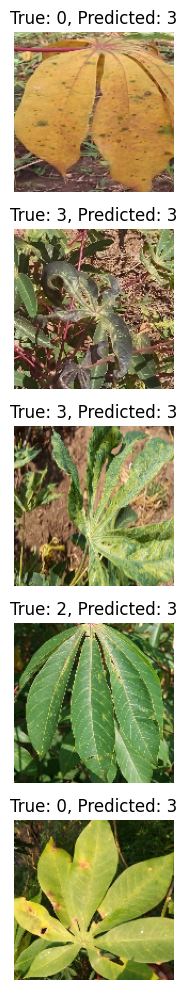

In [35]:
# Tomar algunas imágenes del conjunto de prueba
sample_test_images = ds_test_cassava.take(5)  # Tomar 5 imágenes como ejemplo

# Hacer predicciones
predicted_labels = []
true_labels = []
images = []

for image, label in sample_test_images:
    label = label.numpy()

    # Hacer la predicción
    prediction = improved_cassava_model.predict(tf.expand_dims(image, axis=0))
    predicted_label = np.argmax(prediction)

    # Almacenar los resultados
    predicted_labels.append(predicted_label)
    true_labels.append(label)
    images.append(image)

# Visualizar las imágenes con las etiquetas predichas y reales
plt.figure(figsize=(10, 10))
for i, (img, true_label, predicted_label) in enumerate(zip(images, true_labels, predicted_labels)):
    plt.subplot(5, 1, i+1)
    plt.imshow(img)
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Ejercicio 4: Ajuste y Mejora
Experimenta con diferentes hiperparámetros de la red (número de capas,
tamaño de filtro, unidades en capas completamente conectadas, tasa de
aprendizaje, etc.).
U>liza técnicas de regularización como dropout o batch normaliza>on.
Realiza ajustes en la arquitectura para mejorar el rendimiento en los
conjuntos de validación.

In [28]:
import tensorflow as tf

# Definir las transformaciones para la aumentación de datos
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

# Aplicar la aumentación de datos al dataset de entrenamiento
augmented_train_cassava = ds_train_cassava.map(lambda x, y: (data_augmentation(x, training=True), y)).batch(32)


In [31]:
improved_cassava_model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')  # Asumiendo 5 clases para cassava
])

improved_cassava_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [32]:
history_improved_cassava = improved_cassava_model.fit(augmented_train_cassava, validation_data=ds_test_cassava.batch(32), epochs=10)


Epoch 1/10
142/142 [==============================] - 151s 919ms/step - loss: 1.4086 - accuracy: 0.4464 - val_loss: 1.3693 - val_accuracy: 0.4607
Epoch 2/10
142/142 [==============================] - 123s 867ms/step - loss: 1.3763 - accuracy: 0.4712 - val_loss: 1.3585 - val_accuracy: 0.4607
Epoch 3/10
142/142 [==============================] - 123s 868ms/step - loss: 1.3747 - accuracy: 0.4723 - val_loss: 1.3618 - val_accuracy: 0.4607
Epoch 4/10
142/142 [==============================] - 133s 938ms/step - loss: 1.3580 - accuracy: 0.4723 - val_loss: 1.3538 - val_accuracy: 0.4607
Epoch 5/10
142/142 [==============================] - 123s 861ms/step - loss: 1.3528 - accuracy: 0.4723 - val_loss: 1.3538 - val_accuracy: 0.4607
Epoch 6/10
142/142 [==============================] - 127s 892ms/step - loss: 1.3534 - accuracy: 0.4723 - val_loss: 1.3528 - val_accuracy: 0.4607
Epoch 7/10
142/142 [==============================] - 123s 860ms/step - loss: 1.3451 - accuracy: 0.4723 - val_loss: 1.3526 -

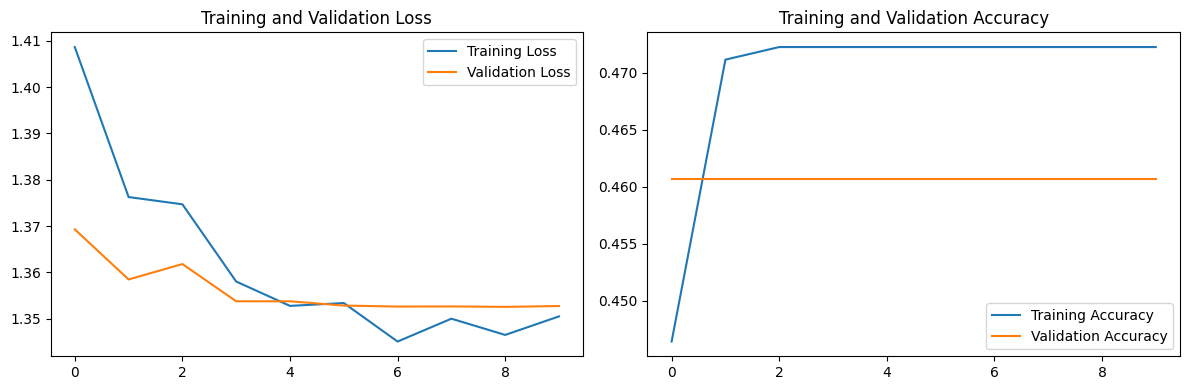

In [36]:
# Visualizar la pérdida y precisión durante el entrenamiento
plt.figure(figsize=(12, 4))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history_improved_cassava.history['loss'], label='Training Loss')
plt.plot(history_improved_cassava.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history_improved_cassava.history['accuracy'], label='Training Accuracy')
plt.plot(history_improved_cassava.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 49ms/step


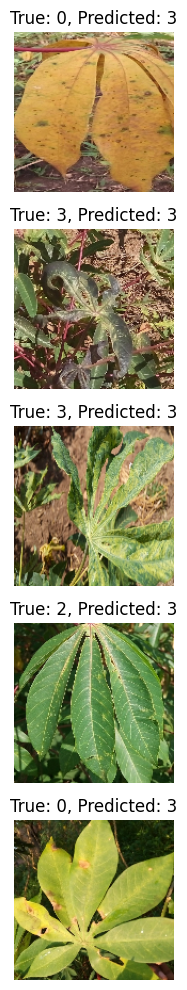

In [38]:
# Tomar algunas imágenes del conjunto de prueba
sample_test_images = ds_test_cassava.batch(5).take(1)  # Tomar 5 imágenes como ejemplo

# Hacer predicciones
predicted_labels = []
true_labels = []
images = []

for batch in sample_test_images:
    image_batch, label_batch = batch
    predictions = improved_cassava_model.predict(image_batch)
    predicted_label_batch = np.argmax(predictions, axis=1)

    # Almacenar los resultados
    predicted_labels.extend(predicted_label_batch)
    true_labels.extend(label_batch.numpy())
    images.extend(image_batch.numpy())

# Visualizar las imágenes con las etiquetas predichas y reales
plt.figure(figsize=(10, 10))
for i, (img, true_label, predicted_label) in enumerate(zip(images, true_labels, predicted_labels)):
    plt.subplot(5, 1, i+1)
    plt.imshow((img * 255).astype(np.uint8))  # Multiplicar por 255 antes de convertir a uint8
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()



Ejercicio 5: Evaluación Final y Comparación
Evalúa tu red neuronal final en el conjunto de prueba de cada dataset (que
no se u>lizó durante el entrenamiento).
Calcula y compara la precisión de la clasificación en ambos datasets.
Reflexiona sobre las diferencias en el rendimiento y posibles razones.

In [33]:
# Evaluación para cassava
loss_cassava, accuracy_cassava = improved_cassava_model.evaluate(ds_test_cassava.batch(32))
print("Test Accuracy for Cassava with Improved Model: {:.2f}%".format(accuracy_cassava * 100))

# Evaluación para plant_village
loss_plant_village, accuracy_plant_village = improved_plant_village_model.evaluate(ds_test_plant_village.batch(32))
print("Test Accuracy for Plant Village with Improved Model: {:.2f}%".format(accuracy_plant_village * 100))


36/36 [==============================] - 11s 289ms/step - loss: 1.3527 - accuracy: 0.4607
Test Accuracy for Cassava with Improved Model: 46.07%
340/340 [==============================] - 114s 334ms/step - loss: 3.6513 - accuracy: 0.0120
Test Accuracy for Plant Village with Improved Model: 1.20%


1/1 [==============================] - 0s 52ms/step


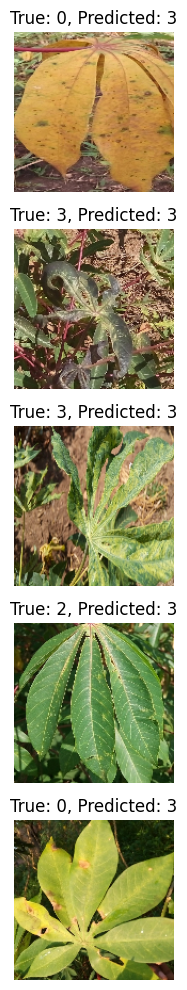

In [39]:
# Tomar algunas imágenes del conjunto de prueba de cassava
sample_test_images_cassava = ds_test_cassava.batch(5).take(1)  # Tomar 5 imágenes como ejemplo

# Hacer predicciones
predicted_labels_cassava = []
true_labels_cassava = []
images_cassava = []

for batch in sample_test_images_cassava:
    image_batch, label_batch = batch
    predictions = improved_cassava_model.predict(image_batch)
    predicted_label_batch = np.argmax(predictions, axis=1)

    # Almacenar los resultados
    predicted_labels_cassava.extend(predicted_label_batch)
    true_labels_cassava.extend(label_batch.numpy())
    images_cassava.extend(image_batch.numpy())

# Visualizar las imágenes con las etiquetas predichas y reales
plt.figure(figsize=(10, 10))
for i, (img, true_label, predicted_label) in enumerate(zip(images_cassava, true_labels_cassava, predicted_labels_cassava)):
    plt.subplot(5, 1, i+1)
    plt.imshow((img * 255).astype(np.uint8))  # Multiplicar por 255 antes de convertir a uint8
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 122ms/step


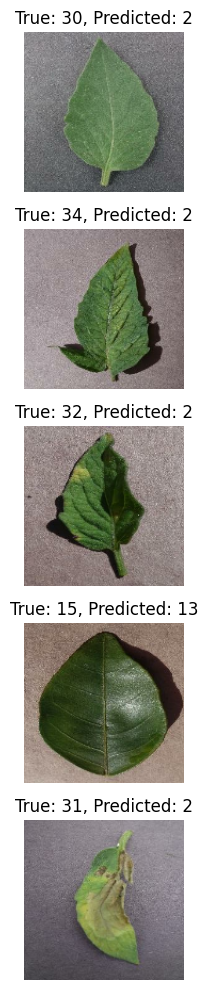

In [40]:
# Tomar algunas imágenes del conjunto de prueba de plant_village
sample_test_images_plant_village = ds_test_plant_village.batch(5).take(1)  # Tomar 5 imágenes como ejemplo

# Hacer predicciones
predicted_labels_plant_village = []
true_labels_plant_village = []
images_plant_village = []

for batch in sample_test_images_plant_village:
    image_batch, label_batch = batch
    predictions = improved_plant_village_model.predict(image_batch)
    predicted_label_batch = np.argmax(predictions, axis=1)

    # Almacenar los resultados
    predicted_labels_plant_village.extend(predicted_label_batch)
    true_labels_plant_village.extend(label_batch.numpy())
    images_plant_village.extend(image_batch.numpy())

# Visualizar las imágenes con las etiquetas predichas y reales
plt.figure(figsize=(10, 10))
for i, (img, true_label, predicted_label) in enumerate(zip(images_plant_village, true_labels_plant_village, predicted_labels_plant_village)):
    plt.subplot(5, 1, i+1)
    plt.imshow((img * 255).astype(np.uint8))  # Multiplicar por 255 antes de convertir a uint8
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()
